# imdb 학습

### 16 * 16 * 1

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# imdb의 데이터를 불러와 훈련에 사용할 train과 훈련 후 모델 검증에 사용할 train으로 나누어 저장한다
# 가장 많이 사용하는 단어 10000개만 사용

In [4]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
word_index = imdb.get_word_index()
# 단어장을 가져온다
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# key와 value를 서로 뒤바꾼다, 정수 데이터가 key가 된다
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# 0, 1, 2는 학습 대상이 아닌 문자들이므로 제외하고 학습 대상인 문자로부터 인덱스를 시작하도록 변경하여 훈련 데이터를 디코딩한다


In [3]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences) :
        for j in sequence:
            results[i, j] = 1. # i리뷰에 존재하는 단어의 index j의 값을 1로 변경한다
    return results

# 여기서 enumerate가 i는 0 sequence는 한 리뷰를 해주는 거고 딕셔너리처럼 0 0번리뷰 1 1번리뷰 2 2번리뷰
# sequence 안에는 각 단어가 있으니까 j는 각 단어의 인덱스겠죠 1번 리뷰 안에 있는 단어의 인덱스 위치를 
# mnist에서는 astype을 하는 이유는 신경망은 간단한 데이터를 좋아하는데 지금 255니까 0~1로 바꿔주는거죠
# astype은 float로만 바꿔주는거고 거기서 / 255를 하니까 0 ~ 1

In [4]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
# 훈련 데이터를 각각의 리뷰마다 같은 크기를 가지는 벡터로 변경한다
x_train

25000

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
# 레이블은 스칼라 값이므로 간단히 벡터로 변환이 가능하다
y_train
# float32가 신경망 연산에 최적화

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
x_train.shape


(25000, 10000)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용 

# 이게 입력 데이터는 무조건 (batch, feature) 형태로 만들어야 하는데
# label은 스칼라 값의 배열이니까 (25000,) 이잖아요 그래서 feature 부분에 1은 그냥 붙일 수 있는거니까
# mnist 흑백 데이터에서도 원래 이미지가 (x, y, rgb)인데 흑백이니까 rgb가 1이잖아요 그래서 그냥 없엔 (x, y)로 쓰니까 1은 붙이든 안붙이든
# 그냥 float32는 원래 int 데이터니까 바꾼거같은데 0, 1에서 1. 이런식으로?

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용

In [ ]:
x_val = x_train[:10000] # 훈련 데이터에서 index 0 ~ 9999인 데이터만 검증 데이터로 분리한다
partial_x_train = x_train[10000:] # 훈련 데이터에서 index 10000 부터는 훈련에 사용한다
y_val = y_train[:10000] # 훈련 레이블에서 index 0 ~ 9999인 데이터만 검증 레이블로 분리한다
partial_y_train = y_train[10000:]  # 훈련 레이블에서 ndex 10000 부터는 훈련에 사용한다


In [ ]:
partial_x_train.shape
x_val.shape

(10000, 10000)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# 부분적인 x, y로 20번의 반복 횟수동안 512개씩 수행하며 검증 데이터로 x_val, y_val을 사용한다
# 훈련 기록을 history에 저장한다

Epoch 1/20
30/30 [==============================] - 10s 270ms/step - loss: 0.5209 - accuracy: 0.7897 - val_loss: 0.3887 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3045 - accuracy: 0.9079 - val_loss: 0.3076 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2244 - accuracy: 0.9266 - val_loss: 0.2877 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1775 - accuracy: 0.9438 - val_loss: 0.2745 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1447 - accuracy: 0.9533 - val_loss: 0.3006 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1209 - accuracy: 0.9619 - val_loss: 0.3058 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0981 - accuracy: 0.9707 - val_loss: 0.3217 - val_accuracy: 0.8798
Epoch 8/20


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

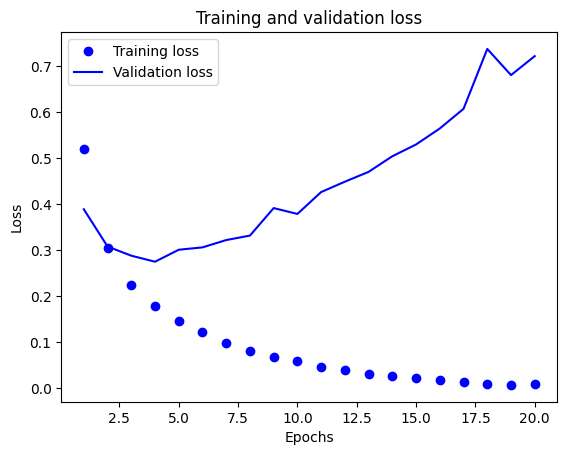

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss

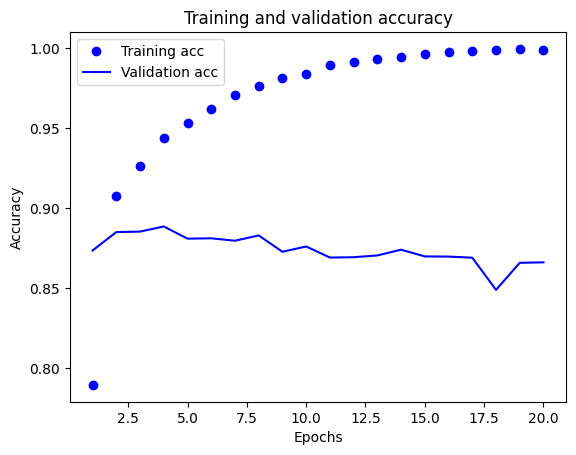

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 accuracy

In [ ]:
# history에 저장된 기록으로 적절한 epoch를 결정한다.
# epoch 4 이후로 손실이 증가하므로 epoch는 4까지만 수행한다
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 25ms/step - loss: 0.4749 - accuracy: 0.8223
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2747 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2067 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3134 - accuracy: 0.8765


In [ ]:
print(results)

[0.3133738934993744, 0.876479983329773]


### 1개 층 사용
### 층 유닛 16
### 함수 relu
### 손실 cross

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 1개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 두 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용 

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# 부분적인 x, y로 20번의 반복 횟수동안 512개씩 수행하며 검증 데이터로 x_val, y_val을 사용한다
# 훈련 기록을 history에 저장한다

Epoch 1/15
30/30 [==============================] - 7s 174ms/step - loss: 0.4968 - accuracy: 0.7939 - val_loss: 0.3970 - val_accuracy: 0.8535
Epoch 2/15
30/30 [==============================] - 1s 39ms/step - loss: 0.3116 - accuracy: 0.9015 - val_loss: 0.3170 - val_accuracy: 0.8825
Epoch 3/15
30/30 [==============================] - 2s 54ms/step - loss: 0.2401 - accuracy: 0.9270 - val_loss: 0.2911 - val_accuracy: 0.8845
Epoch 4/15
30/30 [==============================] - 1s 38ms/step - loss: 0.1974 - accuracy: 0.9393 - val_loss: 0.2756 - val_accuracy: 0.8910
Epoch 5/15
30/30 [==============================] - 1s 32ms/step - loss: 0.1665 - accuracy: 0.9503 - val_loss: 0.2871 - val_accuracy: 0.8828
Epoch 6/15
30/30 [==============================] - 1s 41ms/step - loss: 0.1422 - accuracy: 0.9594 - val_loss: 0.2856 - val_accuracy: 0.8852
Epoch 7/15
30/30 [==============================] - 1s 29ms/step - loss: 0.1257 - accuracy: 0.9641 - val_loss: 0.2879 - val_accuracy: 0.8848
Epoch 8/15
3

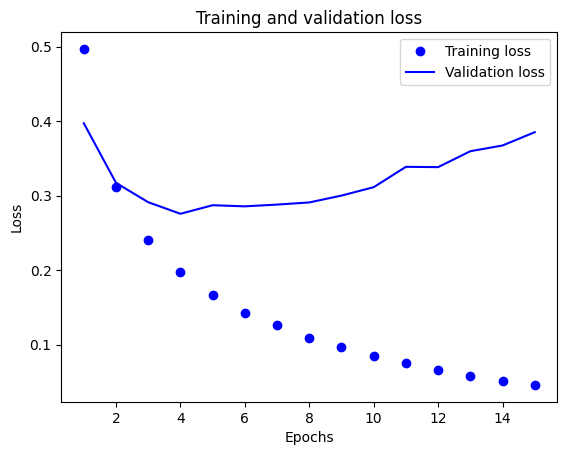

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 accuracy

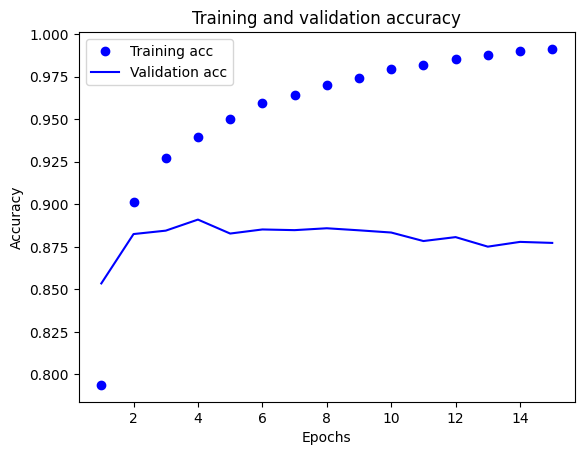

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 accuracy

epoch를 6에서 끊는 것이 합리적이라고 생각

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
49/49 [==============================] - 2s 18ms/step - loss: 0.4409 - accuracy: 0.8259
Epoch 2/6
49/49 [==============================] - 1s 17ms/step - loss: 0.2725 - accuracy: 0.9076
Epoch 3/6
49/49 [==============================] - 1s 19ms/step - loss: 0.2166 - accuracy: 0.9265
Epoch 4/6
49/49 [==============================] - 1s 20ms/step - loss: 0.1849 - accuracy: 0.9370
Epoch 5/6
49/49 [==============================] - 1s 18ms/step - loss: 0.1637 - accuracy: 0.9445
Epoch 6/6
782/782 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8822


In [ ]:
print(results)

[0.2961255609989166, 0.8822000026702881]


### 3개 층 사용
### 층 유닛 16
### 함수 relu
### 손실 cross

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 7s 167ms/step - loss: 0.5186 - accuracy: 0.7781 - val_loss: 0.3846 - val_accuracy: 0.8692
Epoch 2/15
30/30 [==============================] - 1s 32ms/step - loss: 0.3028 - accuracy: 0.8997 - val_loss: 0.2986 - val_accuracy: 0.8891
Epoch 3/15
30/30 [==============================] - 1s 33ms/step - loss: 0.2126 - accuracy: 0.9287 - val_loss: 0.2994 - val_accuracy: 0.8789
Epoch 4/15
30/30 [==============================] - 1s 35ms/step - loss: 0.1659 - accuracy: 0.9441 - val_loss: 0.2898 - val_accuracy: 0.8856
Epoch 5/15
30/30 [==============================] - 1s 30ms/step - loss: 0.1303 - accuracy: 0.9559 - val_loss: 0.3137 - val_accuracy: 0.8821
Epoch 6/15
30/30 [==============================] - 1s 33ms/step - loss: 0.1078 - accuracy: 0.9641 - val_loss: 0.3126 - val_accuracy: 0.8841
Epoch 7/15
30/30 [==============================] - 1s 32ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.3551 - val_accuracy: 0.8750
Epoch 8/15
3

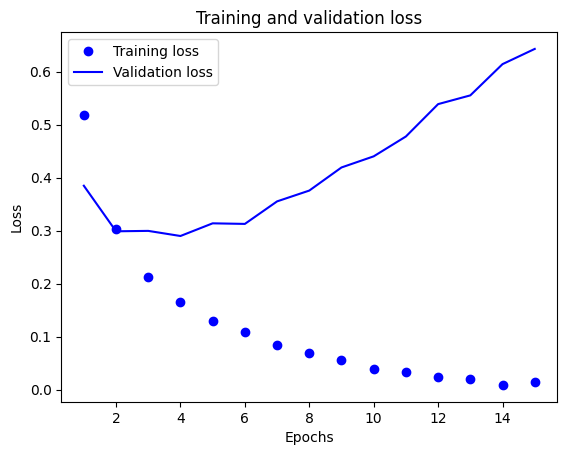

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

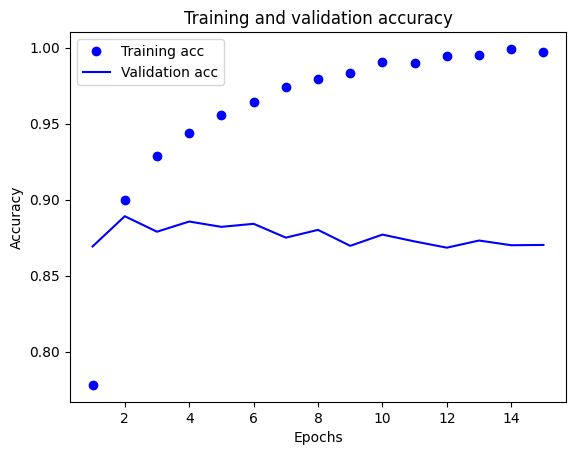

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch를 4에서 끊는 것이 합리적이라 생각

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 23ms/step - loss: 0.4648 - accuracy: 0.8081
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2537 - accuracy: 0.9085
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.1939 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.3069 - accuracy: 0.8803


In [ ]:
print(results)

[0.3068816065788269, 0.8802800178527832]


### 3개 층 사용
### 층 유닛 64, 32, 16
### 함수 relu
### 손실 cross

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 8s 189ms/step - loss: 0.5381 - accuracy: 0.7387 - val_loss: 0.3715 - val_accuracy: 0.8738
Epoch 2/15
30/30 [==============================] - 1s 49ms/step - loss: 0.2984 - accuracy: 0.8947 - val_loss: 0.3430 - val_accuracy: 0.8588
Epoch 3/15
30/30 [==============================] - 1s 49ms/step - loss: 0.2135 - accuracy: 0.9256 - val_loss: 0.2879 - val_accuracy: 0.8886
Epoch 4/15
30/30 [==============================] - 2s 53ms/step - loss: 0.1552 - accuracy: 0.9466 - val_loss: 0.3120 - val_accuracy: 0.8826
Epoch 5/15
30/30 [==============================] - 2s 64ms/step - loss: 0.1216 - accuracy: 0.9587 - val_loss: 0.3164 - val_accuracy: 0.8832
Epoch 6/15
30/30 [==============================] - 2s 55ms/step - loss: 0.1035 - accuracy: 0.9638 - val_loss: 0.3346 - val_accuracy: 0.8844
Epoch 7/15
30/30 [==============================] - 2s 51ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.3613 - val_accuracy: 0.8791
Epoch 8/15
3

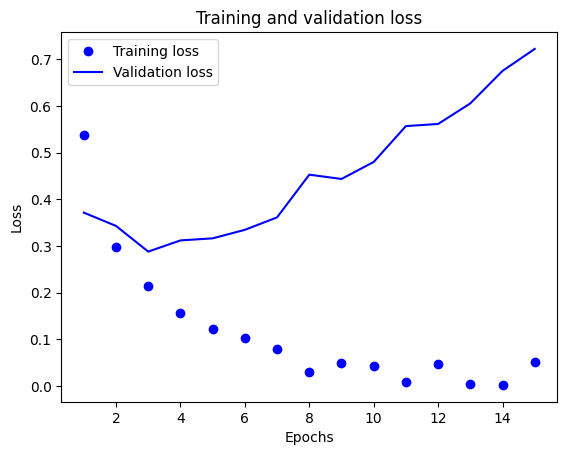

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

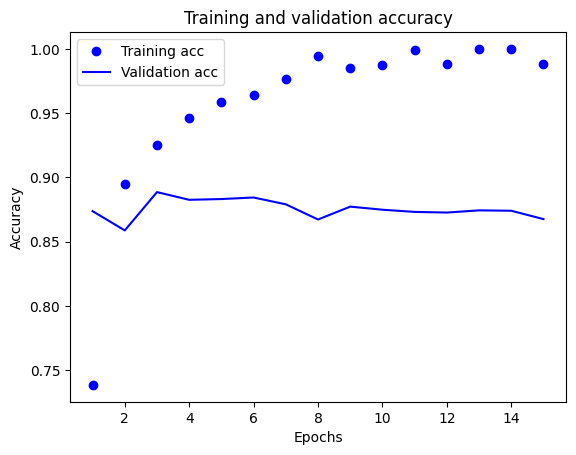

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2에서 끊는 것이 합리적

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 3s 36ms/step - loss: 0.4577 - accuracy: 0.7930
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.2897 - accuracy: 0.8843


In [ ]:
print(results)

[0.28974464535713196, 0.8843200206756592]


### 2개 층 사용
### 층 유닛 16
### 함수 tanh
### 손실 cross

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 6s 150ms/step - loss: 0.4928 - accuracy: 0.7939 - val_loss: 0.3668 - val_accuracy: 0.8756
Epoch 2/15
30/30 [==============================] - 1s 37ms/step - loss: 0.2853 - accuracy: 0.9087 - val_loss: 0.2933 - val_accuracy: 0.8877
Epoch 3/15
30/30 [==============================] - 1s 35ms/step - loss: 0.2023 - accuracy: 0.9350 - val_loss: 0.2853 - val_accuracy: 0.8840
Epoch 4/15
30/30 [==============================] - 1s 31ms/step - loss: 0.1576 - accuracy: 0.9475 - val_loss: 0.2769 - val_accuracy: 0.8891
Epoch 5/15
30/30 [==============================] - 1s 34ms/step - loss: 0.1158 - accuracy: 0.9633 - val_loss: 0.2931 - val_accuracy: 0.8868
Epoch 6/15
30/30 [==============================] - 1s 34ms/step - loss: 0.0918 - accuracy: 0.9733 - val_loss: 0.3506 - val_accuracy: 0.8755
Epoch 7/15
30/30 [==============================] - 1s 30ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.3759 - val_accuracy: 0.8764
Epoch 8/15
3

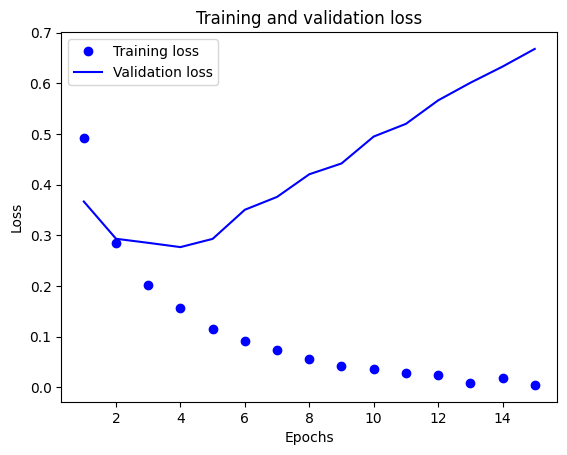

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

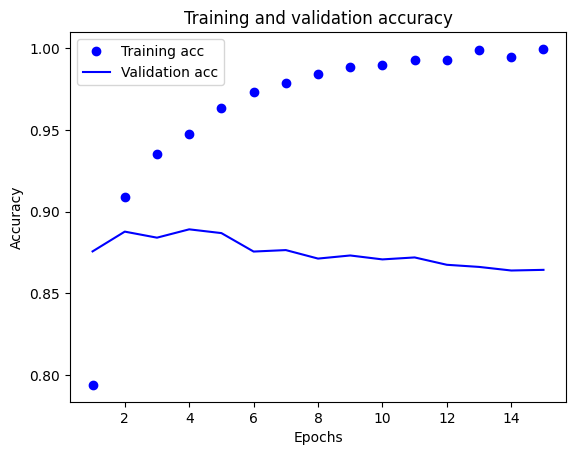

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch를 3에서 끊는것이 합리적

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 23ms/step - loss: 0.4252 - accuracy: 0.8281
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2333 - accuracy: 0.9142
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1784 - accuracy: 0.9340
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3195 - accuracy: 0.8790


In [ ]:
print(results)

[0.3195158839225769, 0.8790000081062317]


### 2개 층 사용
### 층 유닛 36
### 함수 relu
### 손실 mse

In [ ]:
model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dense(36, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 5s 137ms/step - loss: 0.1670 - accuracy: 0.7685 - val_loss: 0.1089 - val_accuracy: 0.8777
Epoch 2/15
30/30 [==============================] - 1s 40ms/step - loss: 0.0832 - accuracy: 0.9053 - val_loss: 0.0900 - val_accuracy: 0.8853
Epoch 3/15
30/30 [==============================] - 1s 47ms/step - loss: 0.0587 - accuracy: 0.9332 - val_loss: 0.0984 - val_accuracy: 0.8661
Epoch 4/15
30/30 [==============================] - 1s 46ms/step - loss: 0.0436 - accuracy: 0.9519 - val_loss: 0.0820 - val_accuracy: 0.8894
Epoch 5/15
30/30 [==============================] - 1s 37ms/step - loss: 0.0367 - accuracy: 0.9600 - val_loss: 0.0884 - val_accuracy: 0.8806
Epoch 6/15
30/30 [==============================] - 1s 40ms/step - loss: 0.0277 - accuracy: 0.9706 - val_loss: 0.0901 - val_accuracy: 0.8790
Epoch 7/15
30/30 [==============================] - 1s 43ms/step - loss: 0.0218 - accuracy: 0.9786 - val_loss: 0.0900 - val_accuracy: 0.8777
Epoch 8/15
3

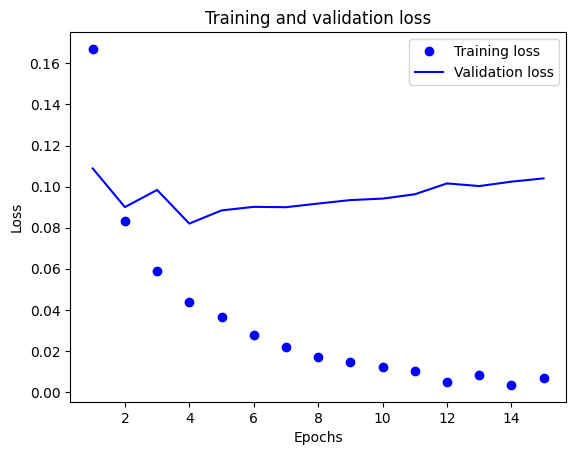

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

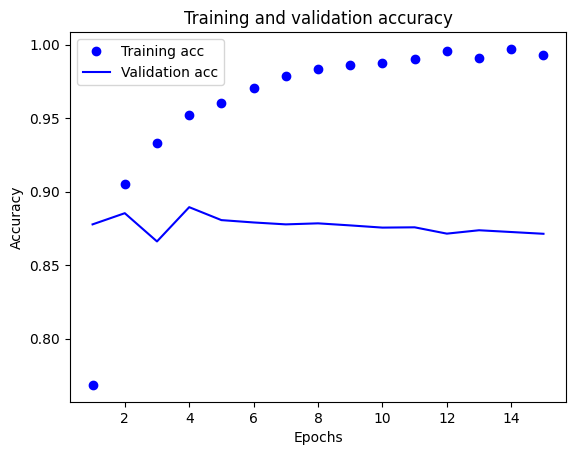

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epoch를 4에서 끊는것이 합리적

In [ ]:
model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dense(36, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 8s 44ms/step - loss: 0.1387 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.0720 - accuracy: 0.9107
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.0552 - accuracy: 0.9315
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.0918 - accuracy: 0.8756


In [ ]:
print(results)

[0.09181623160839081, 0.8755999803543091]


### 5개 층 사용
### 층 유닛 16, 32, 16, 32, 16
### 함수 relu
### 손실 cross

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 5s 128ms/step - loss: 0.5621 - accuracy: 0.7693 - val_loss: 0.4034 - val_accuracy: 0.8573
Epoch 2/15
30/30 [==============================] - 1s 31ms/step - loss: 0.2998 - accuracy: 0.9000 - val_loss: 0.2926 - val_accuracy: 0.8917
Epoch 3/15
30/30 [==============================] - 1s 25ms/step - loss: 0.1967 - accuracy: 0.9355 - val_loss: 0.2789 - val_accuracy: 0.8886
Epoch 4/15
30/30 [==============================] - 1s 24ms/step - loss: 0.1460 - accuracy: 0.9547 - val_loss: 0.2833 - val_accuracy: 0.8853
Epoch 5/15
30/30 [==============================] - 1s 28ms/step - loss: 0.1118 - accuracy: 0.9693 - val_loss: 0.2964 - val_accuracy: 0.8843
Epoch 6/15
30/30 [==============================] - 1s 25ms/step - loss: 0.0856 - accuracy: 0.9788 - val_loss: 0.3180 - val_accuracy: 0.8816
Epoch 7/15
30/30 [==============================] - 1s 24ms/step - loss: 0.0662 - accuracy: 0.9865 - val_loss: 0.3433 - val_accuracy: 0.8790
Epoch 8/15
3

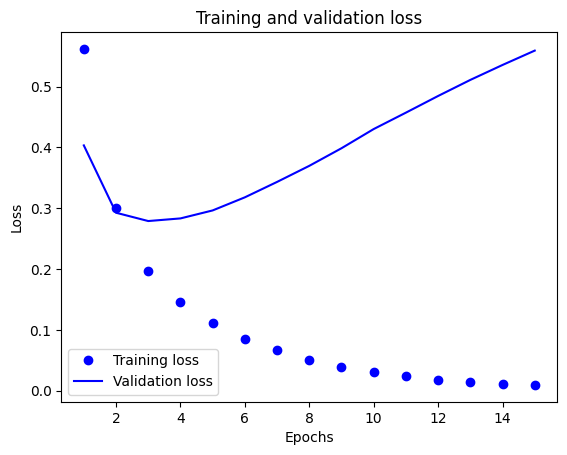

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

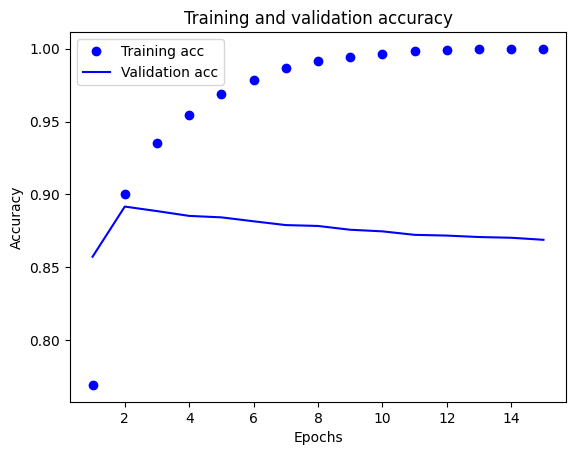

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 5s 18ms/step - loss: 0.4845 - accuracy: 0.8062
Epoch 2/3
49/49 [==============================] - 1s 18ms/step - loss: 0.2498 - accuracy: 0.9082
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2901 - accuracy: 0.8854


In [ ]:
print(results)

[0.2900790870189667, 0.8854399919509888]
